### Import the necessary libraries, packages and modules to get started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import and read the dataset

#### the dataset is obtained from Kaggle:
https://www.kaggle.com/competitions/bank-marketing-uci/overview

In [2]:
df = pd.read_csv(r"D:\Churn Dataset\bank.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Input variables: # bank client data:

1 - age (numeric)


2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Basic Exploratory Data Analysis

In [3]:
df.shape

(4521, 17)

* there are 4521 rows and 17 columns in the dataset

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.isnull().sum().sum()

0

* we can see that there are no missing values in the dataset, hence it is safe to proceed with the data

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Now lets explore each column from the dataset

In [7]:
df.age.value_counts()

34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64

In [8]:
df.age.describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

* Age is not a categorical variable in this case as it is randomly associated here.
* However there are 67 unique ages of people.
* We can see that the minimum age of a person is 19, maxumum is 

In [9]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

* we can see that there are 12 categories in the column, job

In [10]:
df.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

* It can be noticed that there are 3 categories in the column, marital.
* Further, the number of people who are married are nearly 2.5 times than people who are single and the number of married people are more than 5 times the number of divorced people.
* This will lead to class imbalance. It can be addressed by undesampling and oversampling the classes.

In [11]:
df.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

* It can be seen that there are 4 categories in the column, education and we need to represent them sequentially for ease of understanding

In [12]:
df.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

* the number of values in the class no are far more than the number of values in class yes
* this will lead to class imbalance, which can be addressed by using oversampling and undersampling.

In [13]:
df.balance.value_counts()

0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: balance, Length: 2353, dtype: int64

* this is a continuous/ numerical variable.

In [14]:
df.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

* the column, housing has two classes

In [15]:
df.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

* since it has two categories, it is a binary feature
* It can be further seen that the number of values for class 'no' is way more than that of class 'yes'. This can lead to a classical class imbalance problem, which can be fixed using oversampling.

In [16]:
df.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

* this column has three classes
* the number of values in class are very less and it can lead to class imbalance problem.

In [17]:
df.day.value_counts()

20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8     180
29    175
15    174
30    168
13    166
16    164
9     163
11    152
12    151
4     139
2     114
27    113
26    110
3     105
23    102
22     86
25     80
31     59
10     50
24     36
1      27
Name: day, dtype: int64

In [18]:
df.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

* The month of 'may' has a lot more values than the rest of the months. And it is important to note that the months of 'oct, sep, mar,dec' have very low values as compared to the rest of the months.
* this is a problem of class imbalance and can be addressed by undersampling may and oversampling the months which have lower values

In [19]:
df.duration.describe()

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

* The average duration of a person staying is 263 days
* the minimum duration was 4 days
* the maximum duration was 3025 days

In [20]:
df.campaign.value_counts()

1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
19       3
20       3
28       3
24       3
32       2
21       2
23       2
22       2
31       1
29       1
50       1
30       1
44       1
Name: campaign, dtype: int64

In [21]:
df.pdays.value_counts()

-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: pdays, Length: 292, dtype: int64

In [22]:
df.pdays.describe()

count    4521.000000
mean       39.766645
std       100.121124
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

In [23]:
df.previous.describe()

count    4521.000000
mean        0.542579
std         1.693562
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        25.000000
Name: previous, dtype: float64

In [24]:
df.previous.value_counts()

0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
24       1
22       1
23       1
17       1
18       1
15       1
13       1
19       1
20       1
25       1
Name: previous, dtype: int64

In [25]:
df.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

* there are 4 categories in the column, poutcome
* the number of values in the category unknown are more than the combined total of the other 3 categories. 
* this will cause class imbalance

In [26]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

* the 'y' column is the target variable.
* It is clear that the number of values of category 'no' are far more than category 'yes'

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### EDA using visualisation

<AxesSubplot:xlabel='y', ylabel='count'>

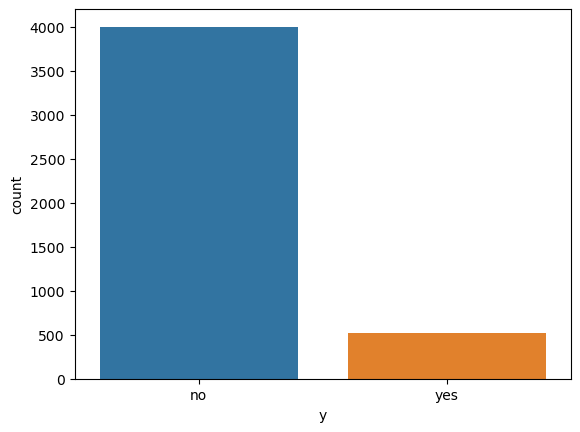

In [28]:
# create count plot of target variable.
sns.countplot(x = 'y', data = df)

* The frequency of 'no' class is far more than the 'yes' class.

<AxesSubplot:xlabel='poutcome', ylabel='count'>

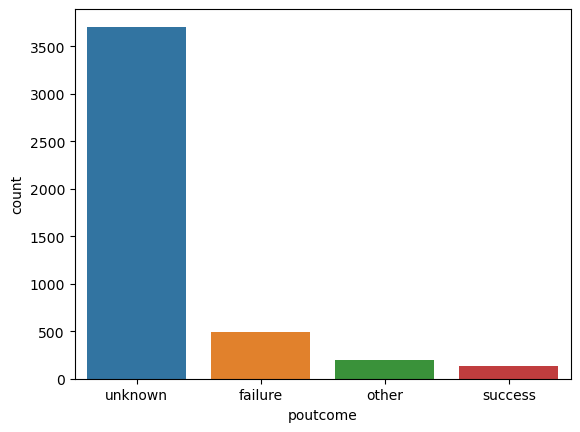

In [29]:
# create count plot of poutcome column
sns.countplot(x = 'poutcome', data = df)

* The count of unknown class is more than the combined count of the three other class
* the second highest count belongs to the 'failure' class
* the class 'other' has the second lowest count
* the class 'success' has the lowest count.
* it is important to note that we need to consider only the classes failure and success as relevant classes. The remaining two needs to be handled to avoid class imbalance.

<AxesSubplot:xlabel='month', ylabel='count'>

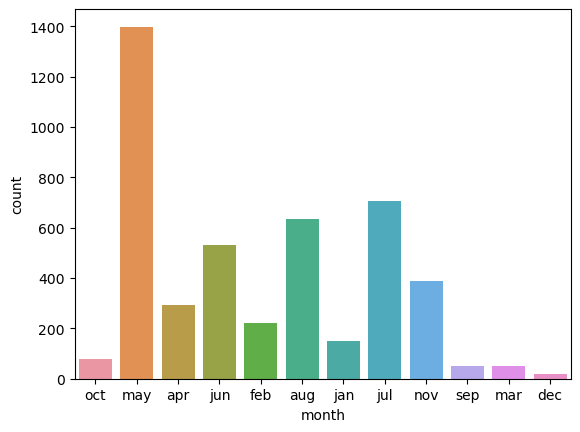

In [30]:
# create count plot of month column
sns.countplot(x = 'month', data = df)

* We can see that the month 'may' has the highest frequency, whereas the month 'dec' has the least count.

<AxesSubplot:xlabel='contact', ylabel='count'>

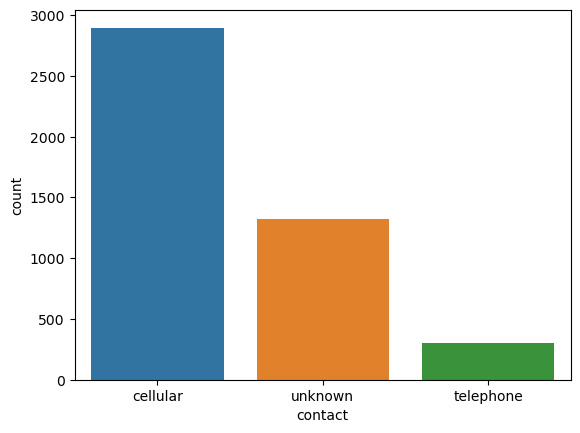

In [31]:
# Count plot of contact column
sns.countplot(x = 'contact', data = df)

* The highest count belongs to the category cellular.
* The lowest count here belongs to the category telephone
* It is important that we handle the unknown category as there are only two relevant categories here.

<AxesSubplot:xlabel='loan', ylabel='count'>

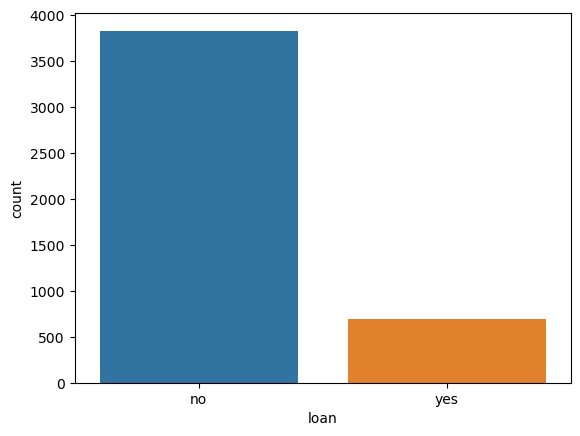

In [32]:
# count plot of loan column
sns.countplot(x = 'loan', data = df)

<AxesSubplot:xlabel='housing', ylabel='count'>

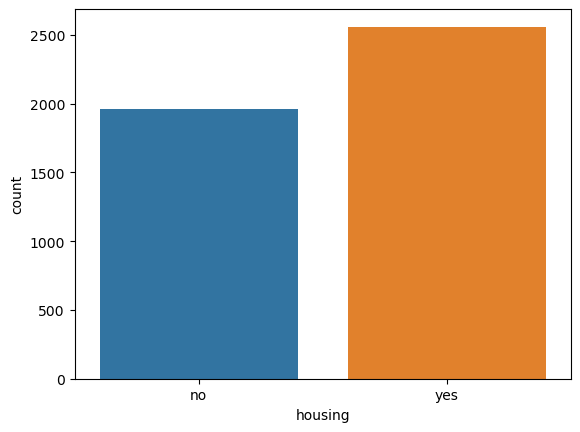

In [33]:
# Count plot of housing column
sns.countplot(x = 'housing', data = df)

<AxesSubplot:xlabel='default', ylabel='count'>

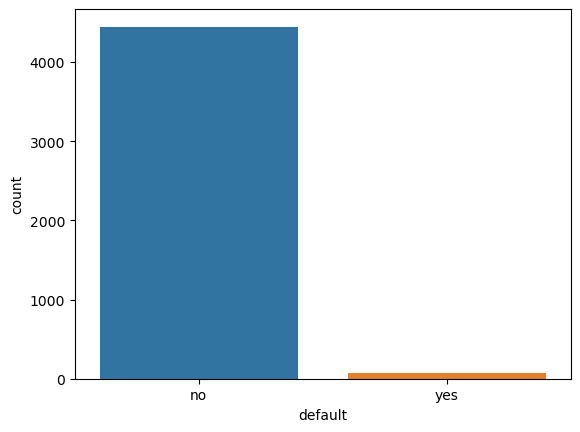

In [34]:
# create count plot of default column
sns.countplot(x = 'default', data = df)

<AxesSubplot:xlabel='marital', ylabel='count'>

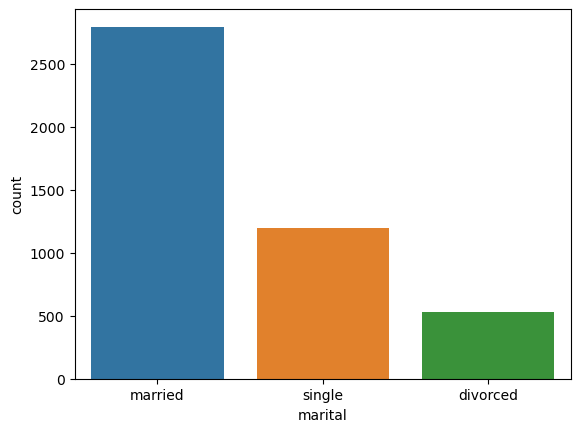

In [35]:
# Count plot pf marital column
sns.countplot(x = 'marital', data = df)

* The number of people who are married has the highest count.
* People who are single has the second highest count.
* People who are divorced has the lowest count

<AxesSubplot:xlabel='job', ylabel='count'>

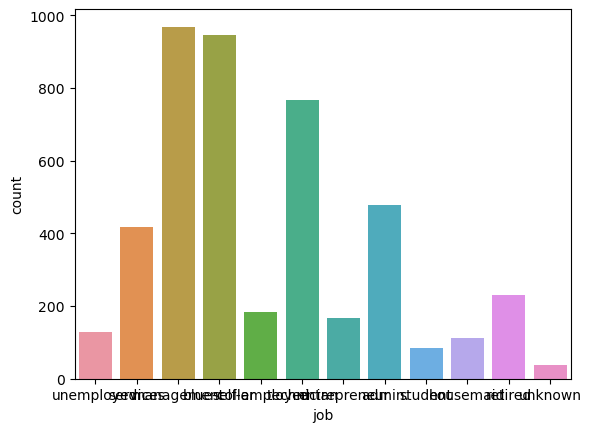

In [36]:
# Count plot of job column
sns.countplot(x = 'job', data = df)

<AxesSubplot:xlabel='education', ylabel='count'>

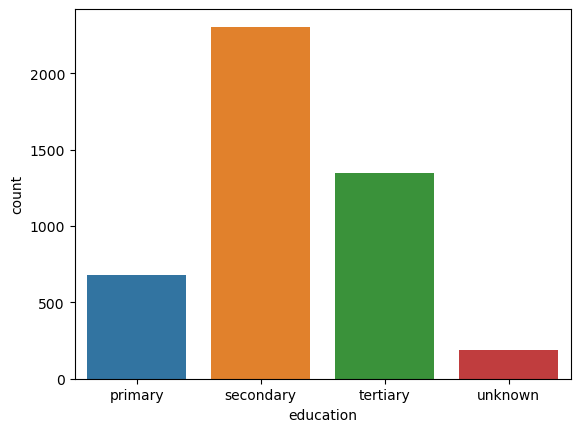

In [37]:
# Count plot of education column
sns.countplot(x = 'education', data = df)

 * It is clear that the number of people who have secondary education are the highest.
 * People who have tertiary education have the second highest count.
 * People who have primary education is the third hgighest.
 * We need to handle the unknown category as there are three relevant categories in this variable.

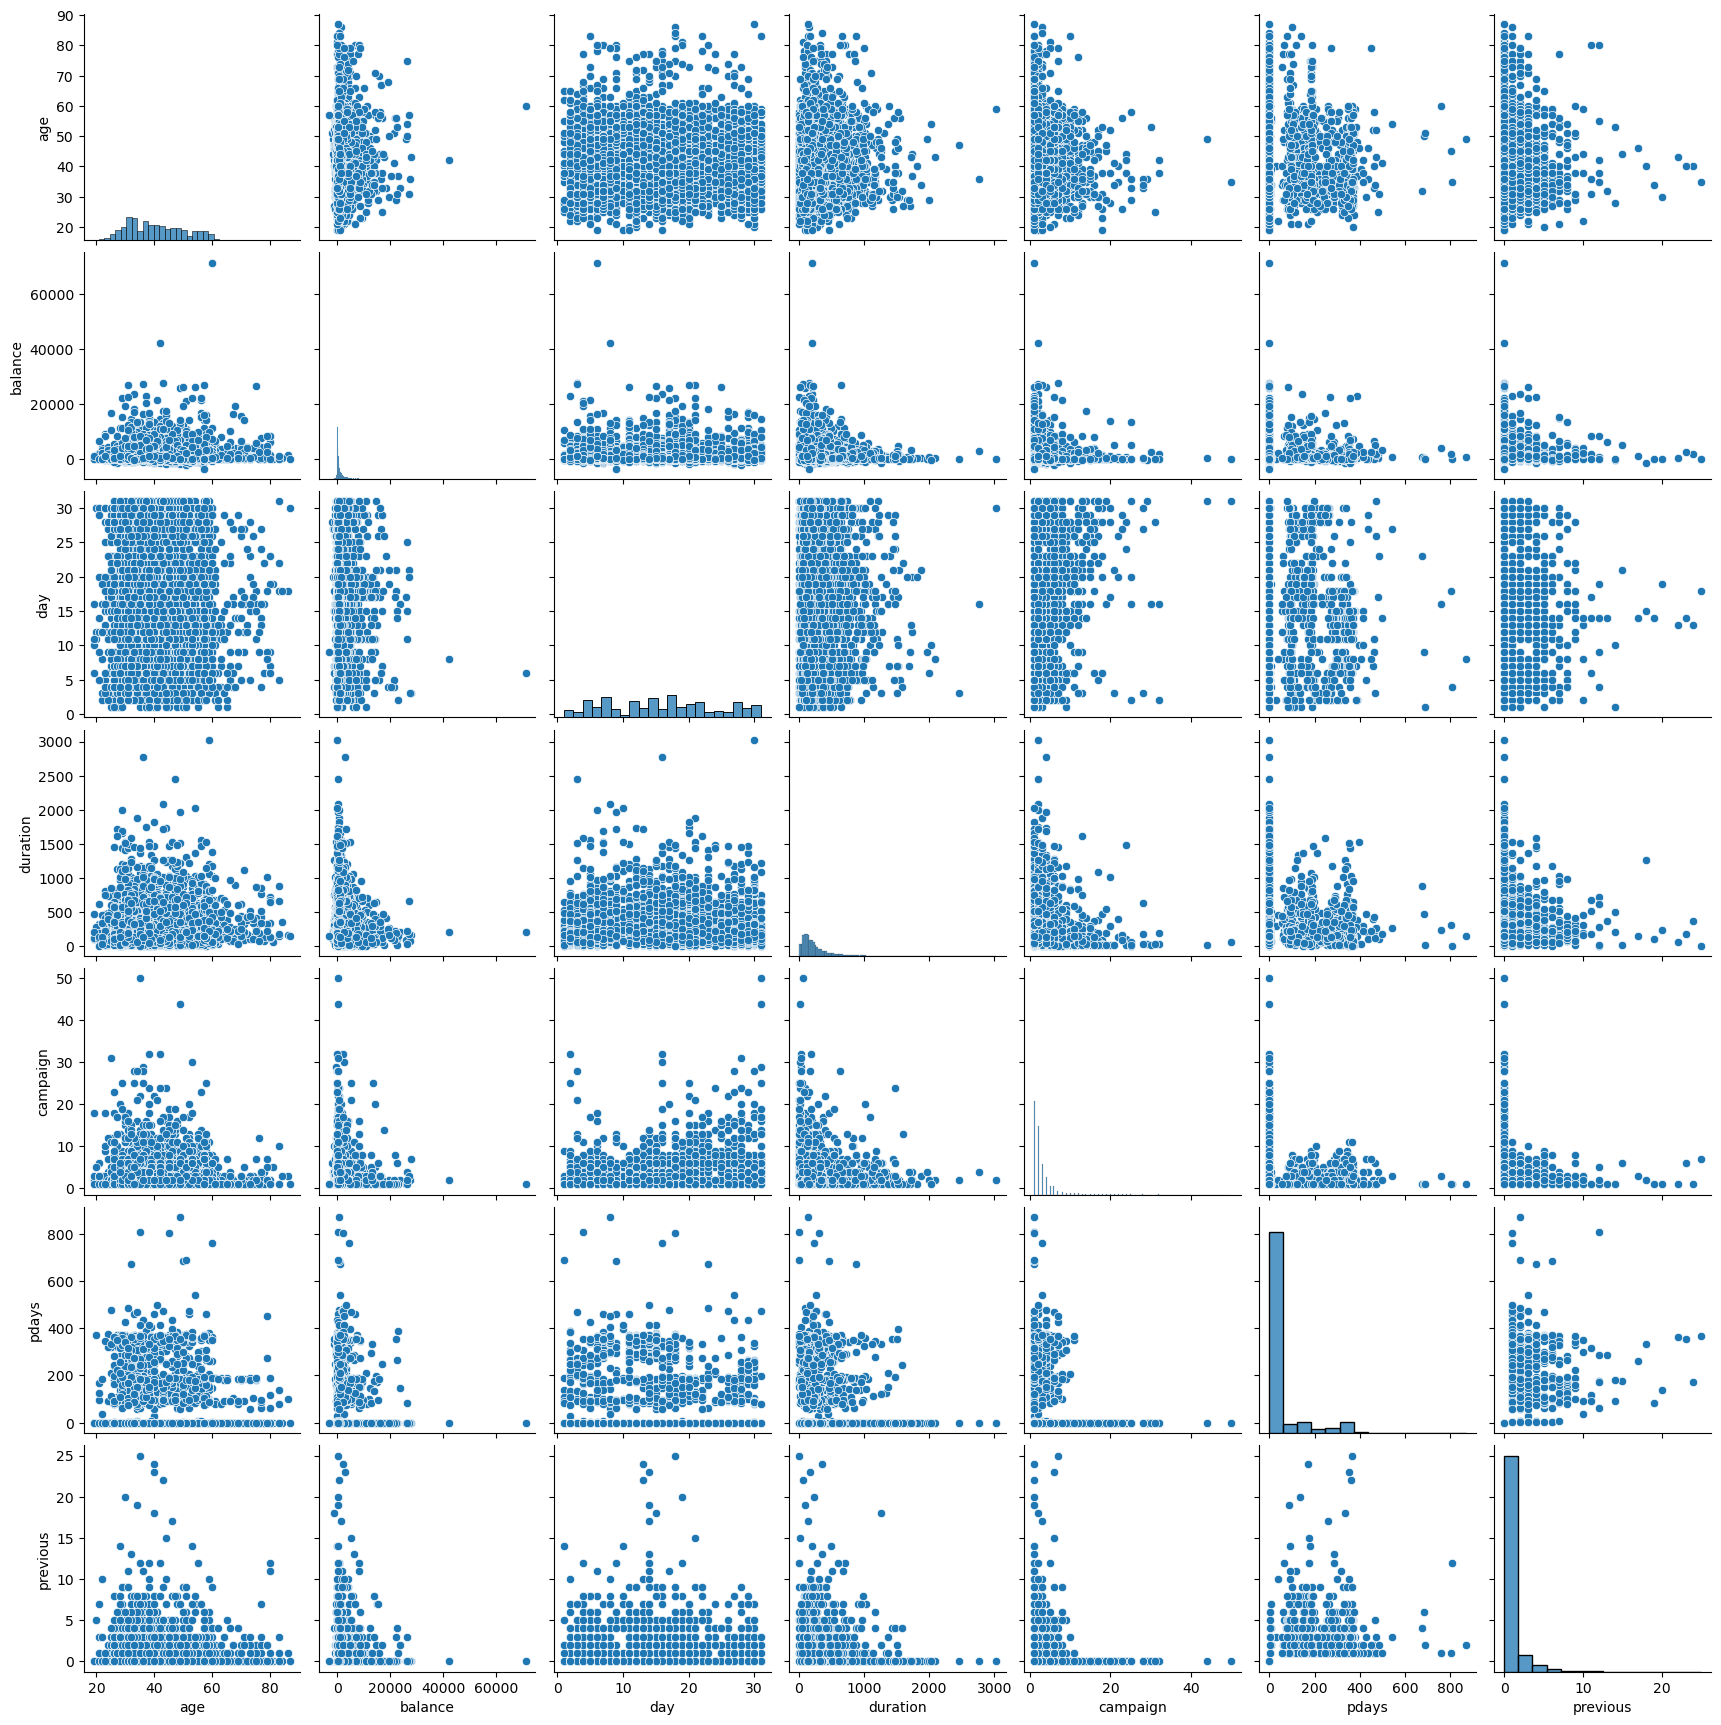

In [38]:
sns.pairplot(df)

* The above pairplot displays scatterplots of all pairs of variables in a dataset and visualizes relationships between variables 

### Now we need to convert the non numerical and categorical classes into numbers, so that it can be processed by the algorithms

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


* We also need to remove irrelevant features/variables

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
df.job = le.fit_transform(df.job)

In [42]:
df.job.value_counts()

4     969
1     946
9     768
0     478
7     417
5     230
6     183
2     168
10    128
3     112
8      84
11     38
Name: job, dtype: int64

In [43]:
# Converting categorial variables to numbers

In [44]:
df.marital = df.marital.replace({'single':0,'married':1,'divorced':2})
df.education = df.education.replace({'primary':0,'secondary':1,'tertiary':2,'unknown':0})
df.default = df.default.replace({'no':0,'yes':1})
df.housing = df.housing.replace({'yes':1,'no':0})
df.loan = df.loan.replace({'no':0,'yes':1})
df.contact = df.contact.replace({'cellular':1,'unknown':0,'telephone':0})
df.month = df.month.replace({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
df.poutcome = df.poutcome.replace({'success':1,'failure':0,'unknown':2,'other':3})
df.y = df.y.replace({'no':0,'yes':1})

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int32
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int32(1), int64(16)
memory usage: 582.9 KB


* Now we can see that all the variables are converted to numeric (int32/int64) type

### Exploring the data and performing feature selection to select the relevant features that will be used in the model.

In [46]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021500,0.381485,-0.201683,-0.017885,0.083820,-0.193888,-0.011250,-0.061794,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,-0.031284,0.045092
job,-0.021500,1.000000,-0.069390,0.167348,0.008324,0.009797,-0.128353,-0.040245,0.071112,0.012865,0.043228,-0.006739,-0.002739,-0.022760,0.005029,0.005282,0.027401
marital,0.381485,-0.069390,1.000000,-0.120183,0.020745,-0.024971,0.029851,0.045210,-0.070810,-0.008794,0.051565,-0.006619,-0.005915,-0.017050,-0.038028,0.015824,-0.015042
education,-0.201683,0.167348,-0.120183,1.000000,-0.010330,0.045872,-0.050019,-0.001003,0.175493,0.015475,0.082983,-0.006774,0.015847,0.009098,0.029620,-0.018836,0.054189
default,-0.017885,0.008324,0.020745,-0.010330,1.000000,-0.070886,0.006881,0.063994,-0.002449,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.043730,0.001303
balance,0.083820,0.009797,-0.024971,0.045872,-0.070886,1.000000,-0.050227,-0.071349,0.000240,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,-0.030737,0.017905
housing,-0.193888,-0.128353,0.029851,-0.050019,0.006881,-0.050227,1.000000,0.018451,-0.164820,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.050256,-0.104683
loan,-0.011250,-0.040245,0.045210,-0.001003,0.063994,-0.071349,0.018451,1.000000,0.008159,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,0.017482,-0.070517
contact,-0.061794,0.071112,-0.070810,0.175493,-0.002449,0.000240,-0.164820,0.008159,1.000000,0.017850,0.171744,0.016191,-0.018435,0.223347,0.167604,-0.170905,0.118761
day,-0.017853,0.012865,-0.008794,0.015475,-0.013261,-0.008677,-0.031291,-0.004879,0.017850,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.059032,-0.011244


* There is a high correlation among 'housing' and the 'y' variables
* The correlation between 'balance' and 'y'; 'pdays' and 'y'; 'previous' and 'y' variables is significant
* A high correlation can be seen between 'duration' and the 'y' variables


<AxesSubplot:>

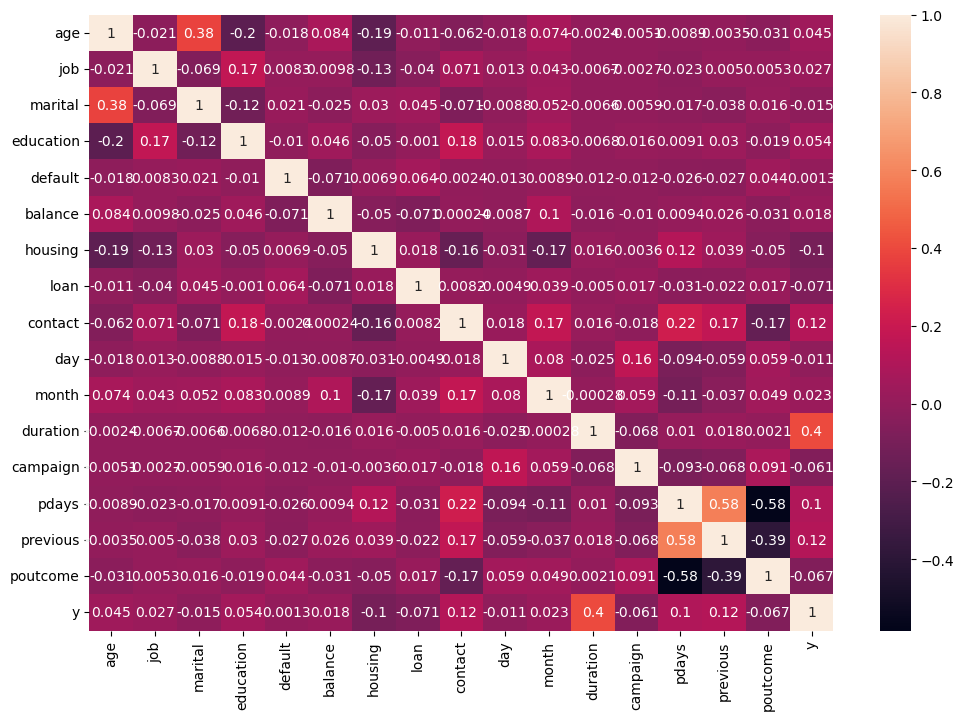

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

### Now we are in the stage to make machine learning models

#### Sampling of data: splitting the data into train and test sets

In [48]:
X =df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Note that this model will be created without addressing class imbalance as we need to compare the performance of the model before and after solving the problem of class imbalance

In [51]:
X.shape

(4521, 16)

In [52]:
y.shape

(4521,)

# Creating logistic regression model

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train);

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# predicting the model on test dataset
pred1 = model1.predict(X_test)
pred1

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [56]:
pred1.shape

(905,)

In [57]:
y_test.shape

(905,)

In [58]:
pred_prob1 = model1.predict_proba(X_test)

### Building confusion matrix to test the performance of the model based on parameters such as accuracy score, precision, recall and f1 score

In [59]:
from sklearn.metrics import confusion_matrix
tab_df = confusion_matrix(y_test, pred1)
tab_df

array([[620, 187],
       [ 23,  75]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred1)*100

76.79558011049724

In [61]:
from sklearn.metrics import precision_score
precision_score(y_test, pred1)*100

28.62595419847328

In [62]:
from sklearn.metrics import recall_score
recall_score(y_test, pred1)*100

76.53061224489795

In [63]:
from sklearn.metrics import f1_score
f1_score(y_test, pred1)*100

41.666666666666664

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       807
           1       0.29      0.77      0.42        98

    accuracy                           0.77       905
   macro avg       0.63      0.77      0.64       905
weighted avg       0.89      0.77      0.81       905



### Building ROC AUC Score

In [65]:
#auroc curve tpr vs fpr
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc_score(y_test, pred1)
fpr,tpr, the=roc_curve(y_test, pred_prob1[:,1])

In [66]:
roc_auc_score(y_test, pred1)

0.7667918468502642

Text(0.5, 0.5, 'auroc is 0.5427')

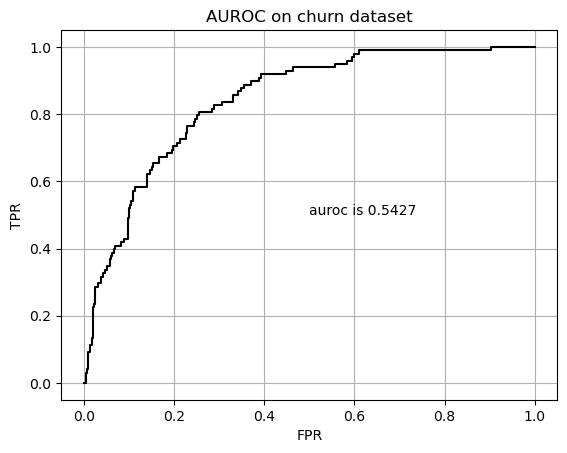

In [67]:
plt.plot(fpr,tpr, color="black")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUROC on churn dataset")
plt.grid()
plt.text(x=.5,y=.5,s="auroc is 0.5427")

### Now we need to address the class imbalance problem in the dataset
* This can be achieved by using SMOTE technique

In [68]:
# Importing the necessary libraries/modules
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class
smote = SMOTE()

In [69]:
# Split the data into training and test sets (we are keeping the training and test data constant)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [70]:
# Train a model on the resampled data
model2 = LogisticRegression()
model2.fit(X_train_resampled, y_train_resampled)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
# Evaluate the model on the test data
pred2 = model2.predict(X_test)

In [72]:
pred_prob2 = model2.predict_proba(X_test)

In [73]:
pred2.shape

(905,)

### Building confusion matrix and other evaluation parameters such as accuracy score, precision score, recall score, and f1 score

In [74]:
from sklearn.metrics import confusion_matrix
tab_df2 = confusion_matrix(y_test, pred2)
tab_df2

array([[658, 149],
       [ 29,  69]], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred2)*100

80.33149171270718

In [76]:
from sklearn.metrics import precision_score
precision_score(y_test, pred2)*100

31.65137614678899

In [77]:
from sklearn.metrics import recall_score
recall_score(y_test, pred2)*100

70.40816326530613

In [78]:
from sklearn.metrics import f1_score
f1_score(y_test, pred2)*100

43.67088607594937

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       807
           1       0.32      0.70      0.44        98

    accuracy                           0.80       905
   macro avg       0.64      0.76      0.66       905
weighted avg       0.89      0.80      0.83       905



* We can see that the accuracy of the model after handling class imbalance has reduced
* However, the recall score has drastically improved. A high recall score is vital in output-sensitive predictions.
* The f1 score has improved as well. Since it is a combination of precision and recall scores, it is a better metric to compare evaluate the models
* Hence the tradeoff is justified.

### Building ROC AUC Score

In [80]:
#auroc curve tpr vs fpr
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc_score(y_test, pred2)
fpr,tpr, the=roc_curve(y_test, pred_prob2[:,1])

In [81]:
roc_auc_score(y_test, pred2)

0.7597235920390462

Text(0.5, 0.5, 'auroc is 0.76449')

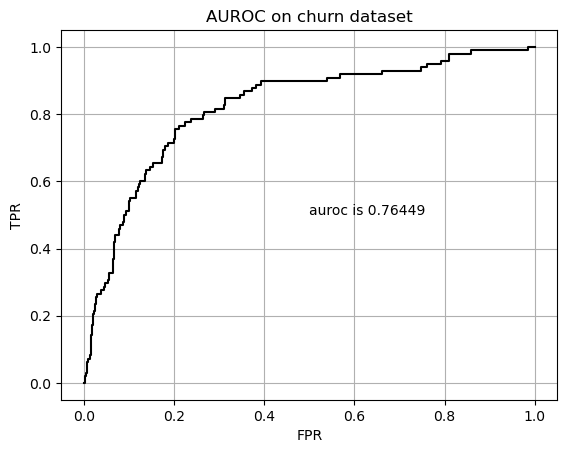

In [82]:
plt.plot(fpr,tpr, color="black")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUROC on churn dataset")
plt.grid()
plt.text(x=.5,y=.5,s="auroc is 0.76449")

## Model3: Random Forest Classifier model

In [83]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=15, criterion='entropy', max_depth=30)
model3.fit(X_train, y_train);

In [84]:
pred3 = model3.predict(X_test)

In [85]:
pred_prob3 = model3.predict_proba(X_test)

In [86]:
model3.feature_importances_

array([0.1026623 , 0.05032517, 0.0246989 , 0.02492415, 0.00224326,
       0.11685707, 0.02111875, 0.01068579, 0.01944375, 0.09195463,
       0.08862385, 0.29978132, 0.04010762, 0.05369262, 0.02429025,
       0.02859057])

In [87]:
model3.feature_importances_.sum()

1.0

In [88]:
feature_imp = pd.DataFrame({'Features':X_train.columns, 'Importance':model3.feature_importances_})
feature_imp

,Features,Importance
0,age,0.102662
1,job,0.050325
2,marital,0.024699
3,education,0.024924
4,default,0.002243
5,balance,0.116857
6,housing,0.021119
7,loan,0.010686
8,contact,0.019444
9,day,0.091955


In [89]:
feature_imp.sort_values('Importance', ascending=False)

,Features,Importance
11,duration,0.299781
5,balance,0.116857
0,age,0.102662
9,day,0.091955
10,month,0.088624
13,pdays,0.053693
1,job,0.050325
12,campaign,0.040108
15,poutcome,0.028591
3,education,0.024924


* We can see that the most important feature is duration, and the least important feature is default.

### Building confusion matrix and other evaluation parameters such as accuracy score, precision score, recall score, and f1 score

In [90]:
tab_rfc =confusion_matrix(y_test, pred3)
tab_rfc

array([[787,  20],
       [ 70,  28]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred3)*100

90.05524861878453

In [92]:
from sklearn.metrics import precision_score
precision_score(y_test, pred3)*100

58.333333333333336

In [93]:
from sklearn.metrics import recall_score
recall_score(y_test, pred3)*100

28.57142857142857

In [94]:
from sklearn.metrics import f1_score
f1_score(y_test, pred3)*100

38.35616438356164

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.58      0.29      0.38        98

    accuracy                           0.90       905
   macro avg       0.75      0.63      0.66       905
weighted avg       0.88      0.90      0.89       905



* It is clearly visible that the accuracy score in model3 i.e. Random Forest Classifier is the highest
* The precision score has increased as well.
* However, recall score has drastically dropped which is not good for the model.

### Building ROC AUC Score

In [96]:
#auroc curve tpr vs fpr
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc_score(y_test, pred3)
fpr,tpr, the=roc_curve(y_test, pred_prob3[:,1])

In [97]:
roc_auc_score(y_test, pred3)

0.630465569127279

Text(0.5, 0.5, 'auroc is 0.6196 ')

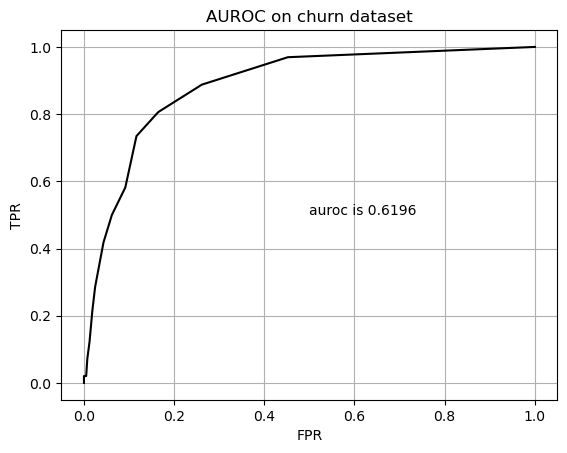

In [98]:
plt.plot(fpr,tpr, color="black")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUROC on churn dataset")
plt.grid()
plt.text(x=.5,y=.5,s="auroc is 0.6196 ")

### Model4: RFC by fine tuning the hyper parameters

In [99]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=7, criterion='gini', max_depth=6, class_weight='balanced', bootstrap=False)
model4.fit(X_train, y_train);

pred4 = model4.predict(X_test)

pred_prob4 = model4.predict_proba(X_test)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       807
           1       0.33      0.84      0.47        98

    accuracy                           0.80       905
   macro avg       0.65      0.82      0.67       905
weighted avg       0.91      0.80      0.83       905



In [101]:
tab_rfc4 =confusion_matrix(y_test, pred4)
tab_rfc4

array([[641, 166],
       [ 16,  82]], dtype=int64)

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred4)*100

79.88950276243094

In [103]:
from sklearn.metrics import precision_score
precision_score(y_test, pred4)*100

33.064516129032256

In [104]:
from sklearn.metrics import recall_score
recall_score(y_test, pred4)*100

83.6734693877551

In [105]:
from sklearn.metrics import f1_score
f1_score(y_test, pred4)*100

47.398843930635834

* Experimenting with the hyper parameters such as n_estimators, max_depth gave a better result
* Lowering the n_estimators from 20 to 5, and max_depth from 20 to 5 improved the recall_score drastically.
* However the precision score reduced significantly.

### Building auc roc curve

In [106]:
#auroc curve tpr vs fpr
roc_auc_score(y_test, pred3)
fpr,tpr, the=roc_curve(y_test, pred_prob4[:,1])

In [107]:
roc_auc_score(y_test, pred4)

0.8155172849809068

Text(0.5, 0.5, 'auroc is 0.8056 ')

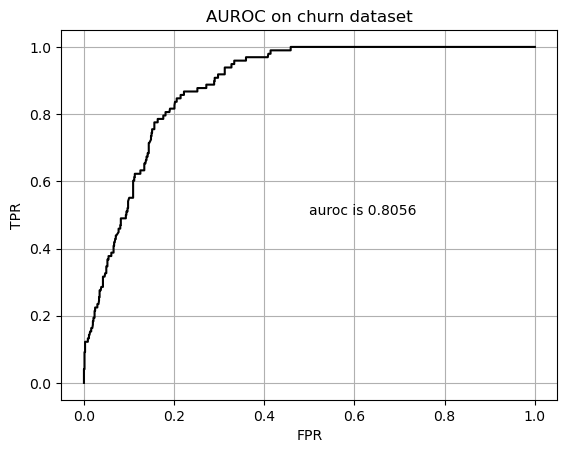

In [108]:
plt.plot(fpr,tpr, color="black")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUROC on churn dataset")
plt.grid()
plt.text(x=.5,y=.5,s="auroc is 0.8056 ")

### Model5: Gradient boosting on the random forest classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# train the gradient boosting classifier with random forest
model5 = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=30, subsample=1.0, criterion='friedman_mse', 
                                 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=10, 
                                 min_impurity_decrease=0.0, max_features='auto', 
                                 verbose=0)
model5.fit(X_train, y_train)

# make predictions on the test set
pred5 = model5.predict(X_test)

In [110]:
pred_prob5 = model5.predict_proba(X_test)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred5)*100

88.7292817679558

In [112]:
from sklearn.metrics import precision_score
precision_score(y_test, pred5)*100

47.22222222222222

In [113]:
from sklearn.metrics import recall_score
recall_score(y_test, pred5)*100

34.69387755102041

In [114]:
from sklearn.metrics import f1_score
f1_score(y_test, pred5)*100

40.0

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred5))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       807
           1       0.47      0.35      0.40        98

    accuracy                           0.89       905
   macro avg       0.70      0.65      0.67       905
weighted avg       0.87      0.89      0.88       905



In [116]:
pred_prob5 = model5.predict_proba(X_test)

In [117]:
#auroc curve tpr vs fpr
roc_auc_score(y_test, pred5)
fpr,tpr, the=roc_curve(y_test, pred_prob5[:,1])

In [118]:
roc_auc_score(y_test, pred5)

0.649925397668361

Text(0.5, 0.5, 'auroc is 0.6491 ')

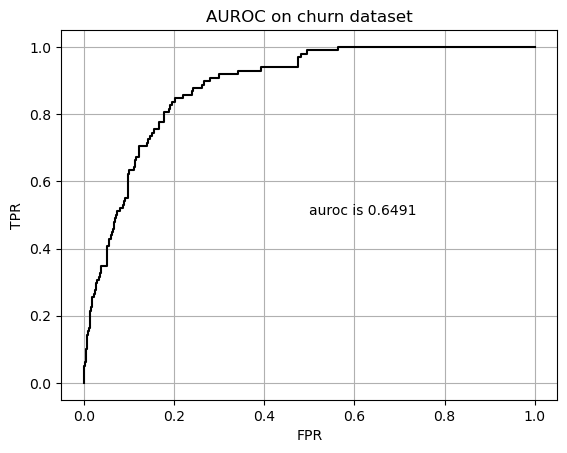

In [119]:
plt.plot(fpr,tpr, color="black")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUROC on churn dataset")
plt.grid()
plt.text(x=.5,y=.5,s="auroc is 0.6491 ")

### Model6: feature selection using SelectFromModel in RFC

In [120]:
from sklearn.feature_selection import SelectFromModel

In [121]:
# Initialize the Random Forest classifier
model6 = RandomForestClassifier(n_estimators=20)

# Train the classifier on the data
model6.fit(X, y)

# Select the most important features based on the classifier's feature importances
sfm = SelectFromModel(model6, threshold=0.005)
X_important = sfm.fit_transform(X, y)

In [122]:
# make predictions on the test set
pred6 = model6.predict(X_test)

In [123]:
pred_prob6 = model6.predict_proba(X_test)

In [124]:
tab_6 =confusion_matrix(y_test, pred6)
tab_6

array([[807,   0],
       [  2,  96]], dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred6)*100

99.77900552486187

In [126]:
from sklearn.metrics import precision_score
precision_score(y_test, pred6)*100

100.0

In [127]:
from sklearn.metrics import recall_score
recall_score(y_test, pred6)*100

97.95918367346938

In [128]:
from sklearn.metrics import f1_score
f1_score(y_test, pred6)*100

98.96907216494846

In [129]:
#auroc curve tpr vs fpr
roc_auc_score(y_test, pred5)
fpr,tpr, the=roc_curve(y_test, pred_prob6[:,1])

In [130]:
roc_auc_score(y_test, pred6)

0.9897959183673469

Text(0.5, 0.5, 'auroc is 0.9846 ')

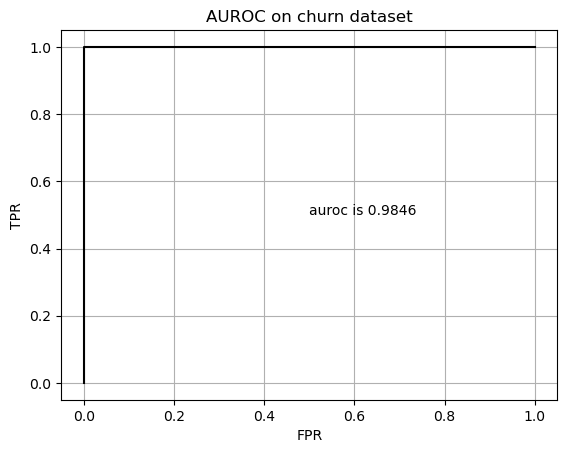

In [131]:
plt.plot(fpr,tpr, color="black")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUROC on churn dataset")
plt.grid()
plt.text(x=.5,y=.5,s="auroc is 0.9846 ")

### Model7: RFC using Boruta

In [132]:
from boruta import BorutaPy

In [133]:
from sklearn.ensemble import RandomForestClassifier
model7 = RandomForestClassifier()

In [134]:
model7 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=10)

In [135]:
feat_selector = BorutaPy(model7, n_estimators=25, verbose=2)
feat_selector.fit(X.values, y.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	10
Iteration

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=10,
                                          n_estimators=25, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x242A46F5340),
         n_estimators=25, random_state=RandomState(MT19937) at 0x242A46F5340,
         verbose=2)

In [136]:
X_important = X.iloc[:, feat_selector.support_]

In [137]:
model7.fit(X_important, y)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=25,
                       n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x242A46F5340)

In [138]:
# make predictions on the test set
pred7 = model7.predict(X_important)

In [139]:
y_test.shape

(905,)

In [140]:
pred7.shape

(4521,)

In [141]:
pred7 = pred7[0:905]

In [142]:
tab_7 =confusion_matrix(y_test, pred7)
tab_7

array([[681, 126],
       [ 83,  15]], dtype=int64)

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred7)*100

76.90607734806629

In [144]:
from sklearn.metrics import precision_score
precision_score(y_test, pred7)*100

10.638297872340425

In [145]:
from sklearn.metrics import recall_score
recall_score(y_test, pred7)*100

15.306122448979592

In [146]:
from sklearn.metrics import f1_score
f1_score(y_test, pred7)*100

12.552301255230129

### Feature selection using chi square

In [147]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [148]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# fit and transform the feature matrix X
X_scaled = scaler.fit_transform(X)

In [149]:
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_scaled, y)

### Model8: RFC with Cross validation

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
model8 = RandomForestClassifier(n_estimators=100, random_state=0, bootstrap= False)

In [152]:
scores = cross_val_score(model8, X, y, cv=5)

In [153]:
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Mean accuracy: 0.8973673788686256
Standard deviation: 0.00507332476835156


In [154]:
model8.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, random_state=0)

In [155]:
# make predictions on the test set
pred8 = model8.predict(X_test)

In [156]:
tab_8 =confusion_matrix(y_test, pred8)
tab_8

array([[781,  26],
       [ 66,  32]], dtype=int64)

In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred8)*100

89.8342541436464

In [158]:
from sklearn.metrics import precision_score
precision_score(y_test, pred8)*100

55.172413793103445

In [159]:
from sklearn.metrics import recall_score
recall_score(y_test, pred8)*100

32.6530612244898

In [160]:
from sklearn.metrics import f1_score
f1_score(y_test, pred8)*100

41.02564102564102

## Visualising overfitting of model

### Model1

In [161]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# generate learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(model1, X, y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [162]:
# calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

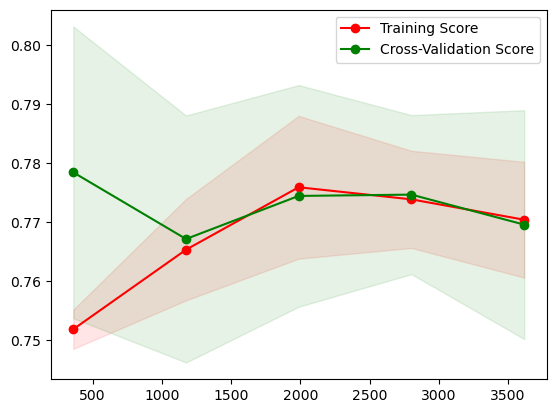

In [163]:
# plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
         label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

### Model 2

In [164]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# generate learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(model2, X, y)

# calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

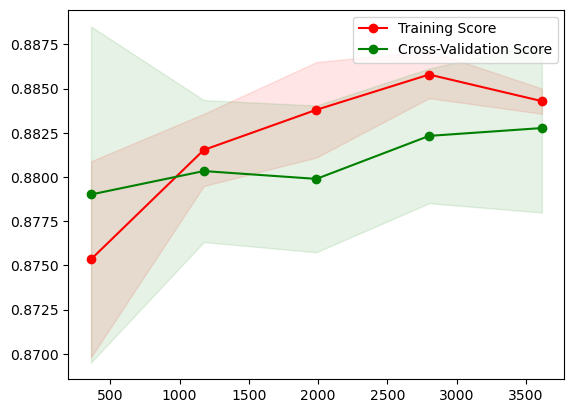

In [165]:
# plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
         label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

### Model 3

In [166]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# generate learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(model3, X, y)

# calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



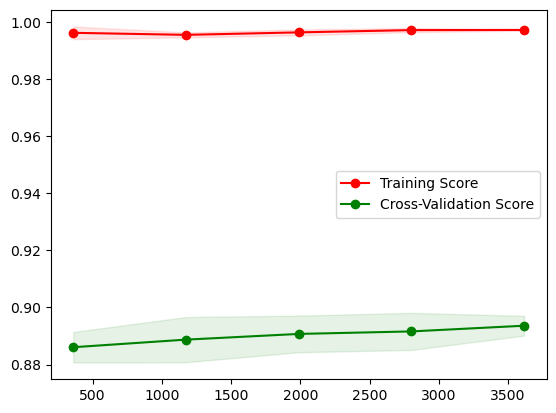

In [167]:
# plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
         label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

### Model 4

In [168]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# generate learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(model4, X, y)

# calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



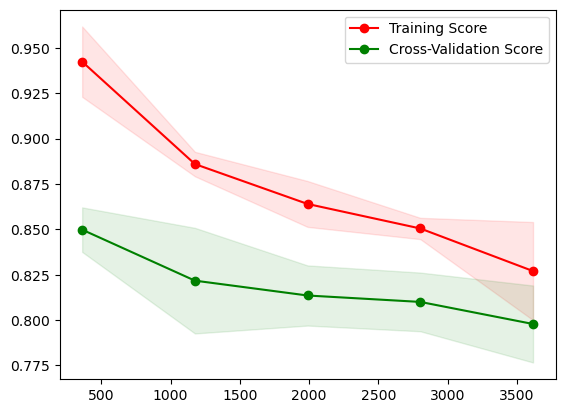

In [169]:
# plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
         label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

### Model 5

In [170]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# generate learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(model5, X, y)

# calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



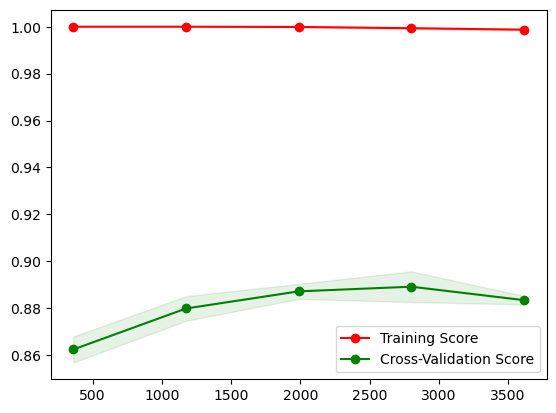

In [171]:
# plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
         label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

### Model 6

In [172]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# generate learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(model6, X, y)

# calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



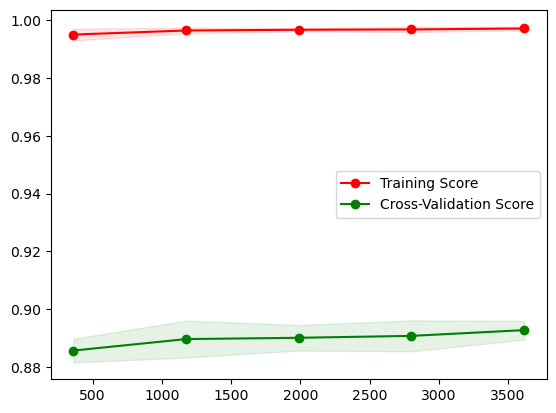

In [173]:
# plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
         label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

### Model 7

In [174]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# generate learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(model7, X, y)

# calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



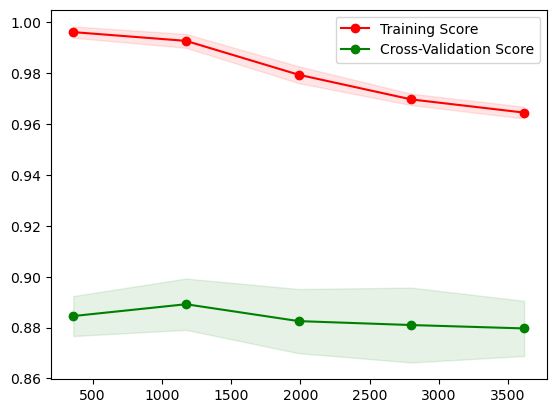

In [175]:
# plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
         label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

### Model 8

In [176]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# generate learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(model8, X, y)

# calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



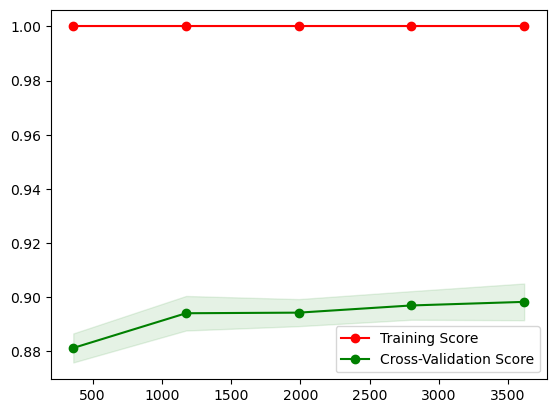

In [177]:
# plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
         label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

* From the visualisation of all the overfitting plots of all the machine learning models, we can see that model1, model2, model3, model4 are working well, but the last 4 models are showing heavy overfitting.

### Building a Xgboost model

In [178]:
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 
# training all the model on the training dataset
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))

0.06863928168968121


## Summarizing the performance of all the machine learning models

In [179]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# list of models and their performance scores
models = [("model1", accuracy_score(y_test, pred1), recall_score(y_test, pred1), precision_score(y_test, pred1), f1_score(y_test, pred1)),
          ("model2", accuracy_score(y_test, pred2), recall_score(y_test, pred2), precision_score(y_test, pred2), f1_score(y_test, pred2)),
          ("model3", accuracy_score(y_test, pred3), recall_score(y_test, pred3), precision_score(y_test, pred3), f1_score(y_test, pred3)),
          ("model4", accuracy_score(y_test, pred4), recall_score(y_test, pred4), precision_score(y_test, pred4), f1_score(y_test, pred4)),
          ("model5", accuracy_score(y_test, pred5), recall_score(y_test, pred5), precision_score(y_test, pred5), f1_score(y_test, pred5)),
          ("model6", accuracy_score(y_test, pred6), recall_score(y_test, pred6), precision_score(y_test, pred6), f1_score(y_test, pred6)),
          ("model7", accuracy_score(y_test, pred7), recall_score(y_test, pred7), precision_score(y_test, pred7), f1_score(y_test, pred7)),
          ("model8", accuracy_score(y_test, pred8), recall_score(y_test, pred7), precision_score(y_test, pred8), f1_score(y_test, pred8))]

In [180]:
# create a data frame from the list of models and scores
df = pd.DataFrame(models, columns=["Model", "Accuracy", "Recall", "Precision", "F1 Score"])

# print the table
print(df)

    Model  Accuracy    Recall  Precision  F1 Score
0  model1  0.767956  0.765306   0.286260  0.416667
1  model2  0.803315  0.704082   0.316514  0.436709
2  model3  0.900552  0.285714   0.583333  0.383562
3  model4  0.798895  0.836735   0.330645  0.473988
4  model5  0.887293  0.346939   0.472222  0.400000
5  model6  0.997790  0.979592   1.000000  0.989691
6  model7  0.769061  0.153061   0.106383  0.125523
7  model8  0.898343  0.153061   0.551724  0.410256


### Conclusion
* 8 Machine learning models were created which includes logistic regression, randomforest classifer, RFC with hyper tuning parameters, Boruta
* There was a challenge of class imbalance and overfitting which were addressed by techniques such as Cross validation, Boruta, Chi-square, feature selection using selecfromModel
* Model6 has the highest score, but it has high overfitting.
* Model4 is the suitable model as it has a high recall score, better precision score and the second highest f1 score. The tradeoff is justified in this case.